<a href="https://colab.research.google.com/github/mariabda2/ML_2022/blob/main/clases/clase_05_Funciones_discriminantes_Gausianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='ffffff'><font size= 1>**Modelos de clasificación empleando funciones de densidad gaussianas**

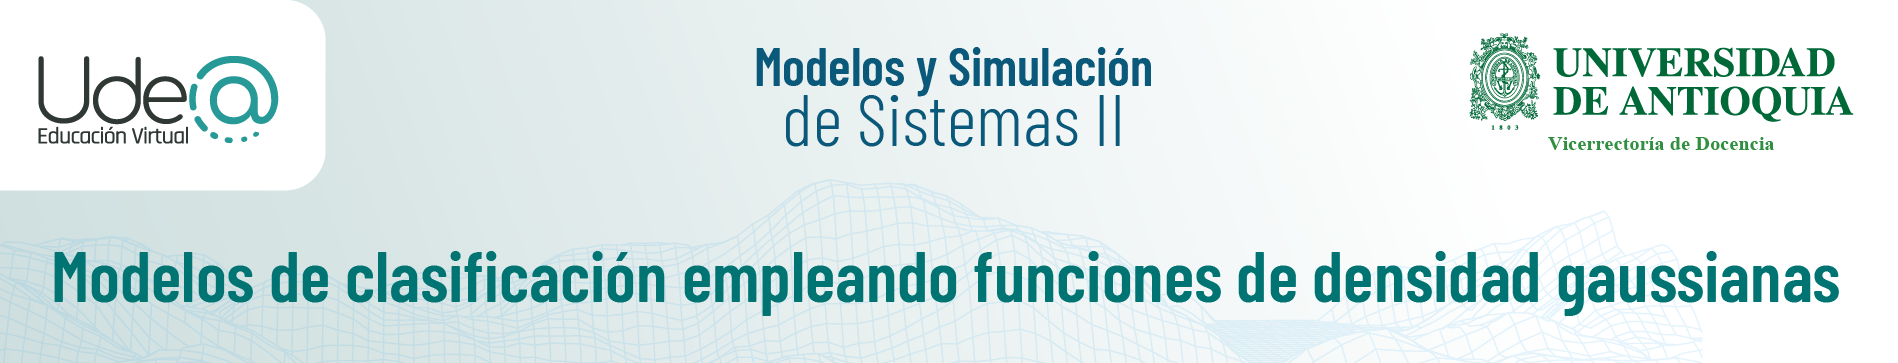

In [ ]:
# Bibliotecas

%matplotlib inline
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.colors import ListedColormap
import seaborn as sbs

import numpy as np

import math
from sklearn import datasets

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")


El objetivo es encontrar las funciones de densidad de probabilidad $$p({\bf{x}})$$ de las clases que permiten realizar la clasificación de una muestra, con base en la probabilidad de que dicha muestra pertenezca a una u otra clase.

Usaremos el dataset Iris para el problema de clasificación. En el UCI Machine Learning Repository se puede hallar más información: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
# IRIS DATABASE
# The Iris dataset consists of 3 types of Iris flowers and their characteristics and classifications.
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,2:4]
Y2 = y[:100]
plt.scatter(X2[:,0], X2[:,1], c=Y2,cmap='Accent');
plt.ylabel('X2')
plt.xlabel('muestra')

Si el modelo de clasificación que pretendemos implementar corresponde entonces a un modelo basado en funciones discriminantes gaussianas, el procedimiento que debemos seguir es el siguiente:

## <font color='ffffff'><font size= 1>**Entrenamiento**

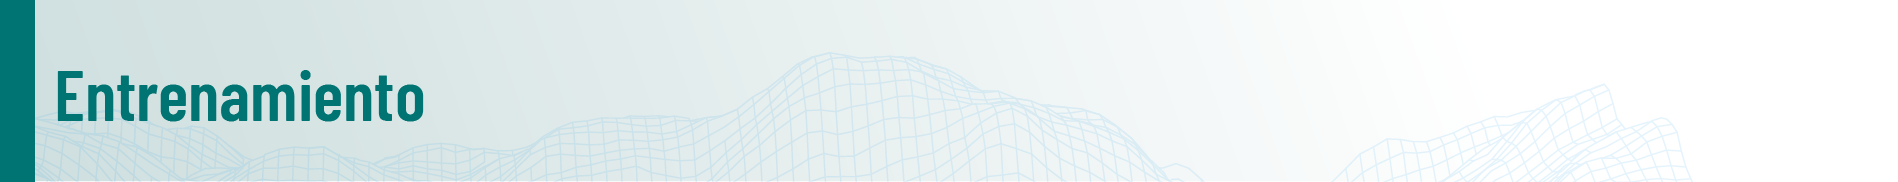

<li>Tomar el conjunto de muestras de entrenamiento y separarlas en $C$ subconjuntos, donde $C$ es el número de clases a reconocer; es decir, que cada subconjunto contiene únicamente muestras de una clase. </li>
<li>Utilizar cada uno de los subconjuntos y estimar los valores del vector de medias y la matriz de covarianza.</li>
<li>Con los valores de media y covarianza, definir una función $p$ (Ecuación 1) para cada una de las clases.</li>


## <font color='ffffff'><font size= 1> **Procedimiento para clasificar una muestra nueva**

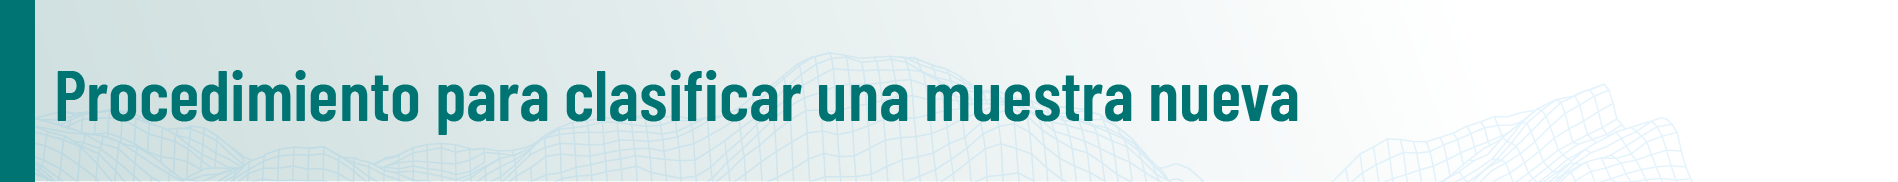

Cuando al sistema ingrese una muestra nueva, es decir, un vector ${\bf{x}}$* para el que no conocemos su clase y deseamos predecirla, debemos:
<li>Evaluar ${\bf{x}}^*$ en cada una de las funciones $p_j$ para cada una las clases $j=1,...,C$. Con esto, vamos a establecer la probabilidad de que la muestra nueva pertenezca a cada una de las clases, de acuerdo con el modelo que hemos asumido (gausiano).</li>
<li>La clase asignada a la muestra ${\bf{x}}^*$ será la clase para la cual la probabilidad sea mayor.</li>

<font color='007473'><font size= 5> $$C* = \mathop {\arg \max }\limits_k p_k({\bf{x}}^*)$$

Si aplicamos este método al conjunto de muestras de la primera figura, obtendremos la siguiente frontera de clasificación:

In [ ]:
def DistribucionGaussiana(X,Mu,Sigma):
    
    d = X.shape[1]
    SigmaInversa = np.linalg.inv(np.array(Sigma))
    PrimerTermino = (1/(((2*math.pi)**(d/2))*math.sqrt(np.linalg.det(Sigma))))
    
    primerDot = np.dot((X-Mu),SigmaInversa)
    segundoDot = np.dot(primerDot,(X-Mu).T)
    Exponencial = math.exp(-0.5*segundoDot)
    
    Probabilidad = PrimerTermino * Exponencial
    
    return Probabilidad

In [ ]:
def FuncionDiscriminanteGaussiana(Tipo=1):
    x_min, x_max = X[:, 2].min() - .1, X[:, 2].max() + .1
    y_min, y_max = X[:, 3].min() - .1, X[:, 3].max() + .1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    #Estimación de medias y Covarianzas
    Mu1 = np.mean(X2[:50,:], axis=0)
    Mu2 = np.mean(X2[51:,:], axis=0)
    
    Sigma1 = np.cov((X2[:50,:]).T)
    Sigma2 = np.cov((X2[51:,:]).T)
    
    Sigma3 = (0.5*(Sigma1+Sigma2))
    
    Z = np.zeros((100,100))
    
    #Evaluando las fdp's en una malla de valores
    for i in range(100):
        for j in range(100):
            Xtem = np.array([xx[1,i],yy[j,1]])[np.newaxis]
            
            if Tipo == 0 :
            
                p1 = DistribucionGaussiana(Xtem,Mu1,Sigma1)
                p2 = DistribucionGaussiana(Xtem,Mu2,Sigma2)
            elif Tipo == 1:
                p1 = DistribucionGaussiana(Xtem,Mu1,Sigma3)
                p2 = DistribucionGaussiana(Xtem,Mu2,Sigma3)
            if p1 >= p2:
                Z[i,j] = 1
            else:
                Z[i,j] = 0
    plt.figure()
    plt.pcolormesh(xx, yy, Z.T, cmap='Accent')
    plt.scatter(X2[:,0], X2[:,1], c=Y2)
    plt.show()    

In [ ]:
from ipywidgets import interact,interactive,fixed, interact_manual
import ipywidgets as widgets

interact(FuncionDiscriminanteGaussiana,Tipo=[('Igual Matriz de Covarianza', 1), ('Diferente Matriz de Covarianza', 0)])

----------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from matplotlib.patches import Ellipse
def plot_ellipse(ax, mu ,sigma):

    vals, vecs = np.linalg.eigh(sigma)
    
    x , y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y,x))
    
    w,h = 4* np.sqrt(vals)
    
    ax.tick_params(axis='both',which='major',labelsize=10)
    ellipse = Ellipse(mu,w,h,theta,color='k')
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)

## <font size= 1> <font color='FFFFFF'>**El modelo anterior tiene tres casos posibles:**

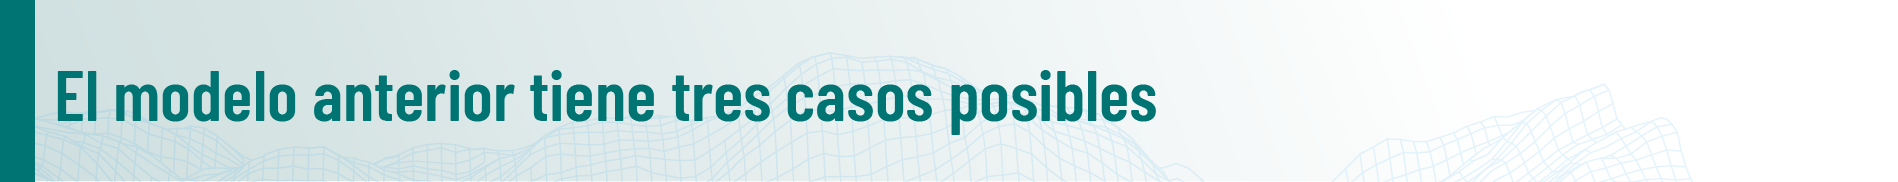

### <font color='007473'> **Caso 1. Matriz de covarianza esférica** 
En este caso lo que se asume es que todas las características se consideran estadísticamente independientes y de igual varianza. Cada clase se considera como un grupo agrupado dentro de un **círculo** perfecto al rededor de su media.

### <font color='007473'> **Caso 2. Matriz de covarianza diagonal** 
Si las matrices de covarianza se consideran diagonales, en este caso, lo que se asume es que todas las características se consideran estadísticamente independientes, pero no de igual varianza. Por lo tanto, las clases se consideran agrupadas en **parábolas** cuyo eje principal puede estar a lo largo de cualquiera de las características.

### <font color='007473'> **Caso 3. Matriz de covarianza completa**
Es el caso más general en el que las matrices de covarianza de los modelos se consideran completas y las clases se consideran agrupadas en **parábolas** cuyo eje principal puede estar en cualquier dirección. En consecuencia, es el caso más flexible.

In [ ]:
## Caso 1
Cov = np.identity(2) * 1.1
Mean = [1.1,2.1]
Mean2 = [5.1,4.1]
ax = plt.subplot(111)
x, y  = np.random.multivariate_normal(Mean, Cov, 60).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov, 60).T
ax.plot(x,y,'x')
ax.plot(x2,y2,'x')
ax.axis('equal')

plot_ellipse(ax,Mean,Cov)
plot_ellipse(ax,Mean2,Cov)

In [ ]:
## Caso 3
Cov = [[1.1,0],[0,2.1]]
Cov2 = [[4.1,2],[2,3.1]]
Mean = [1.1,2.1]
Mean2 = [5.1,4.1]
ax = plt.subplot(111)
x, y  = np.random.multivariate_normal(Mean, Cov, 60).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, 60).T
ax.plot(x,y,'x')
ax.plot(x2,y2,'x')
ax.axis('equal')

plot_ellipse(ax,Mean,Cov)
plot_ellipse(ax,Mean2,Cov2)

<font color='007473'>**Los tres casos anteriores corresponden a:**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
## Caso 1: Matriz de covarianza esférica
clf1 = LinearDiscriminantAnalysis()
clf1.fit(X2,Y2.flatten())
## Caso 2: Matriz de covarianza diagonal
clf2 = GaussianNB()
clf2.fit(X2,Y2.flatten())
## Caso 3: Matriz de covarianza completa
clf3 = QuadraticDiscriminantAnalysis()
clf3.fit(X2,Y2.flatten())
plt.scatter(X2[:,0],X2[:,1],c=Y2.flatten(), cmap='Set2',alpha=0.5)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z1 = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)
Z3 = Z3.reshape(xx.shape)
cs1 = plt.contour(xx, yy, Z1, colors='green')
cs2 = plt.contour(xx, yy, Z2, colors='C0')
cs3 = plt.contour(xx, yy, Z3, colors='darkorange')
h1,_ = cs1.legend_elements()
h2,_ = cs2.legend_elements()
h3,_ = cs3.legend_elements()
labels = ['Caso 1','Caso 2', 'Caso 3']
plt.legend([h1[0], h2[0], h3[0]], ['Caso 1','Caso 2', 'Caso 3'])
for i in range(len(labels)):
    cs1.collections[i].set_label(labels[i])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()

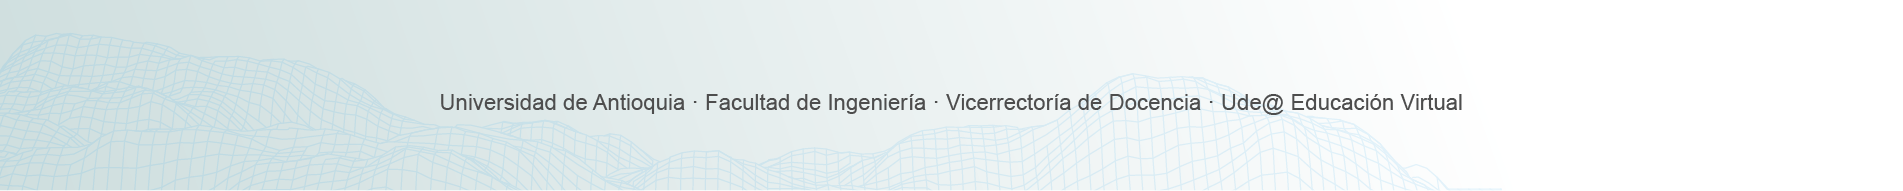